<a href="https://colab.research.google.com/github/syamsulrizal123/TA_Covid19/blob/main/klasifikasi_covid_dan_normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
cd /content/drive/MyDrive/Colab Notebooks (1)/dataset_covid

/content/drive/MyDrive/Colab Notebooks (1)/dataset_covid


In [6]:
ls

accuracy_alexnet.png  best_weight_AlexNet.h5  dataset@  loss_alexnet.png


In [20]:
import numpy as np
import os
from imutils import paths
from PIL import Image
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [21]:
#setting path nya
imagePaths = paths.list_images("normalized")
data = []
labels = []

In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline  # if you are running this code in Jupyter notebook

# reads image 'opencv-logo.png' as grayscale
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks (1)/dataset_covid/normalized/Covid/IM00001.tif') 
img = np.array(img)
img = Image.fromarray(img)
plt.imshow(img, cmap='gray')
plt.show()

UsageError: unrecognized arguments: # if you are running this code in Jupyter notebook


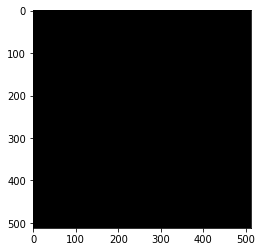

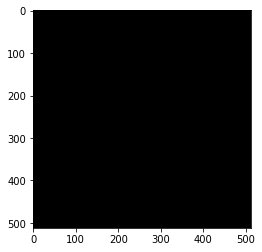

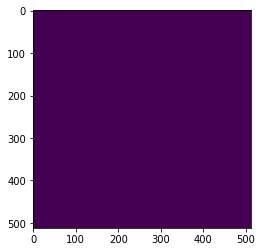

In [44]:
image = Image.open("/content/drive/MyDrive/Colab Notebooks (1)/dataset_covid/normalized/Normal/IM00001.tif")
image1 = image.convert('I')
image2 = image1.point(lambda i:i*(1./256)).convert('L')
image_resize = image2.resize((227,227))
plt.subplots(1)
plt.imshow(image)
plt.subplots(1)
plt.imshow(image1)
plt.subplots(1)
plt.imshow(image2)
plt.show()

In [10]:
#ambil data gambar dan label
for imagePath in imagePaths:
  #load gambar
  image = Image.open(imagePath)
  image.mode = 'I'
  image = image.point(lambda i:i*(1./256)).convert('L')
  image = image.resize((227,227))
  image = np.array(image)
  data.append(image)

  #pasang label
  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(labels)
labels = encoder.transform(labels)

In [12]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
data = np.array(data)
data.shape

(100, 227, 227)

In [19]:
#expand dimenssionnya
data = np.expand_dims(data, axis=3)
data.shape

(100, 227, 227, 1)

In [14]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(75, 227, 227)
(25, 227, 227)
(75,)
(25,)


(227, 227)
<class 'PIL.Image.Image'>


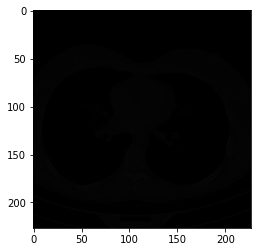

In [19]:
test = trainX[1]
test = np.squeeze(test)
print(test.shape)
image = Image.fromarray(test)
rgbimg = Image.new("RGB", image.size)
rgbimg.paste(image)

print(type(rgbimg))
plt.imshow(rgbimg)
plt.show()

# **ALEXNET**

In [22]:
# model AlexNet
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# **Model Sendiri**

In [38]:
#model coba-coba
model1 = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(227,227,1)),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# **VGG**

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(227,227,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [3]:
base_model = VGG16(include_top=False, input_shape=(227,227,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = BatchNormalization() (x)
x = Dense(1024, activation='relu') (x)
x = Dense(512, activation='relu') (x)
out = Dense(1, activation='sigmoid') (x)

model = Model(inputs = base_model.input, outputs = out)
model.summary()

ValueError: ignored

In [39]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 225, 225, 16)      160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 55, 55, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 46656)            

In [40]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss',
                   patience=10,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_AlexNet.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

In [42]:
from keras.optimizers import Adam, SGD, RMSprop

# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-6)
model1.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32, callbacks=[es, checkpoint])

[INFO] training network...
Epoch 1/50
3/3 [==============================] - 2s 358ms/step - loss: 15.2752 - accuracy: 0.4889 - val_loss: 61.4935 - val_accuracy: 0.4000

Epoch 00001: val_accuracy improved from -inf to 0.40000, saving model to best_weight_AlexNet.h5
Epoch 2/50
3/3 [==============================] - 0s 93ms/step - loss: 33.3533 - accuracy: 0.6185 - val_loss: 3.5505 - val_accuracy: 0.6000

Epoch 00002: val_accuracy improved from 0.40000 to 0.60000, saving model to best_weight_AlexNet.h5
Epoch 3/50
3/3 [==============================] - 0s 92ms/step - loss: 2.4391 - accuracy: 0.6012 - val_loss: 0.3037 - val_accuracy: 0.8800

Epoch 00003: val_accuracy improved from 0.60000 to 0.88000, saving model to best_weight_AlexNet.h5
Epoch 4/50
3/3 [==============================] - 0s 90ms/step - loss: 0.3455 - accuracy: 0.9248 - val_loss: 0.4997 - val_accuracy: 0.8800

Epoch 00004: val_accuracy did not improve from 0.88000
Epoch 5/50
3/3 [==============================] - 0s 79ms/st

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-42-ea26567f5466>", line 7, in <module>
    H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32, callbacks=[es, checkpoint])
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py", line 1145, in fit
    callbacks.on_epoch_end(epoch, epoch_logs)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/callbacks.py", line 428, in on_epoch_end
    callback.on_epoch_end(epoch, logs)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/callbacks.py", line 1344, in on_epoch_end
    self._save_model(epoch=epoch, logs=logs)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/callbacks.py", line 1396, in _save_model
    self.model.save(filepath, overwrite=True, 

KeyboardInterrupt: ignored